# Honeywell Hackathon
## Game of Life

In [1]:
# libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time
%matplotlib notebook

## Utility Functions

In [2]:
def next_generation(padded_population_grid, n):
    offsprings = np.zeros((n,n))
    # summ_vals = np.zeros((n,n))
    for i in range(1,n+1):
        for j in range(1,n+1):
            summ = np.sum(padded_population_grid[i-1:i+2,j-1:j+2])
            # if cell is alive
            if padded_population_grid[i,j]==1:
                if (summ ==3 or summ==4):
                    offsprings[i-1,j-1] = 1
            else:
                if summ==3:
                    offsprings[i-1,j-1] = 1
    #         summ_vals[i-1,j-1] = summ
    return offsprings

In [3]:
def padd_population(population_grid,n):
    padded_population_grid = np.zeros((n+2,n+2))
    padded_population_grid[1:n+1,1:n+1] = population_grid
    return padded_population_grid

In [4]:
def plot_population(population_grid, title = "Initial Population"):
    plt.figure(figsize=(10,10))
    plt.imshow(population_grid,cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.title(title)
    plt.show()

## Taking inputs

In [5]:
# grid size
n = 100
population_grid = np.random.randint(0, 2,size = (n,n))
population_grid

array([[0, 0, 1, ..., 1, 1, 0],
       [1, 0, 1, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 0, 0],
       ..., 
       [1, 1, 1, ..., 0, 0, 1],
       [1, 0, 1, ..., 1, 1, 1],
       [1, 0, 0, ..., 1, 1, 0]])

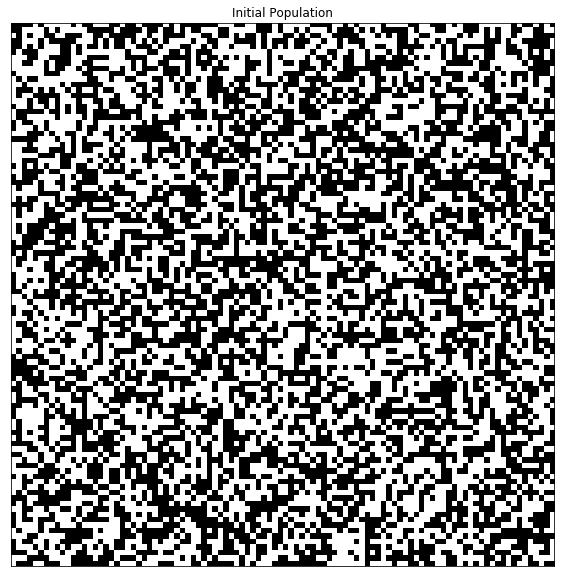

In [6]:
plot_population(population_grid)

In [62]:
# input through console
n = int(input("Enter the size of size of population grid : "))
population_grid = []
print("Enter the population in rows one-by-one :\n")
for _ in range(n):
    population_grid.append(list(map(int, input().split())))
    
population_grid = np.array(population_grid)

Enter the size of size of population grid : 3
Enter the population in rows one-by-one :

1 0 1
0 1 1
0 0 0


## Single iteration -- offspring generation

In [7]:
padded_population_grid = padd_population(population_grid,n)
offsprings = next_generation(padded_population_grid, n)

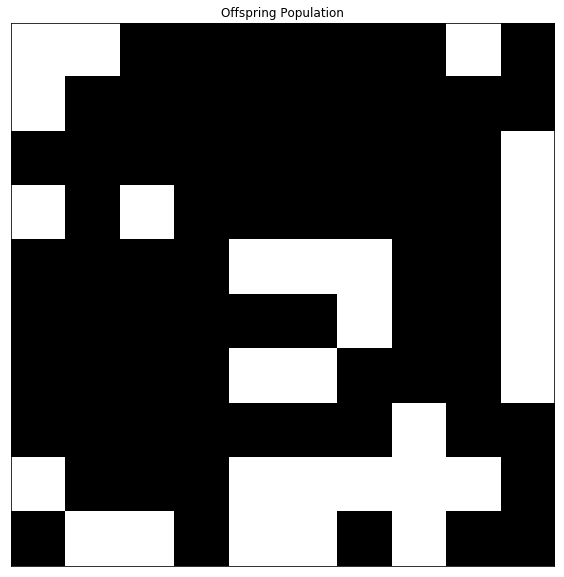

In [8]:
plot_population(offsprings, title="Offspring Population")

## p - step evolution

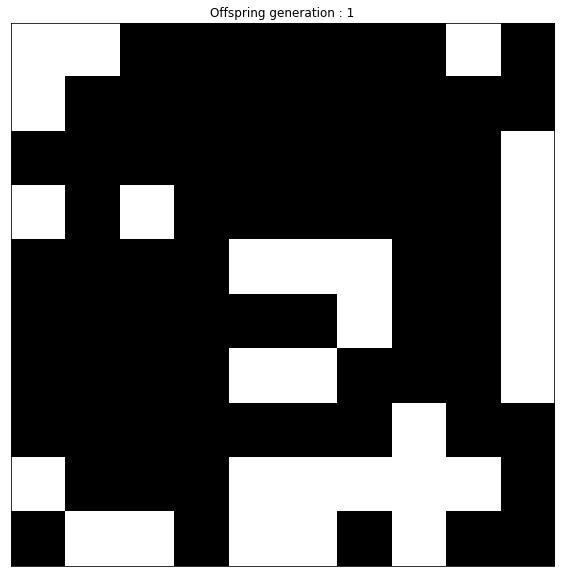

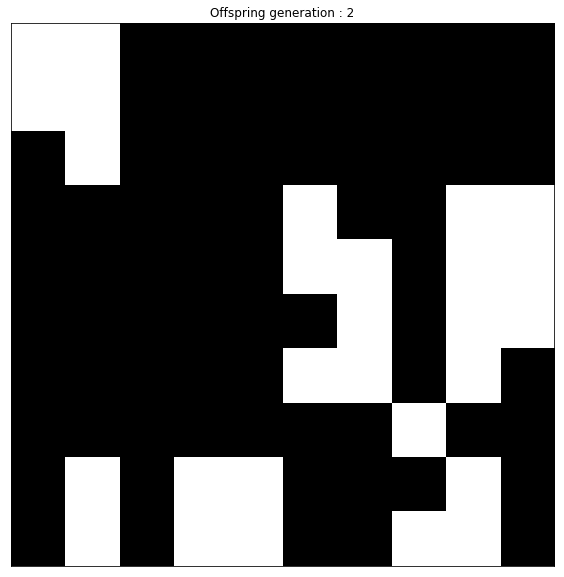

In [9]:
p = 2
for i in range(p):
    padded_population_grid = padd_population(population_grid,n)
    offsprings = next_generation(padded_population_grid, n)
    plot_population(offsprings, f"Offspring generation : {i+1}")
    population_grid = offsprings

## Evolutionary plot

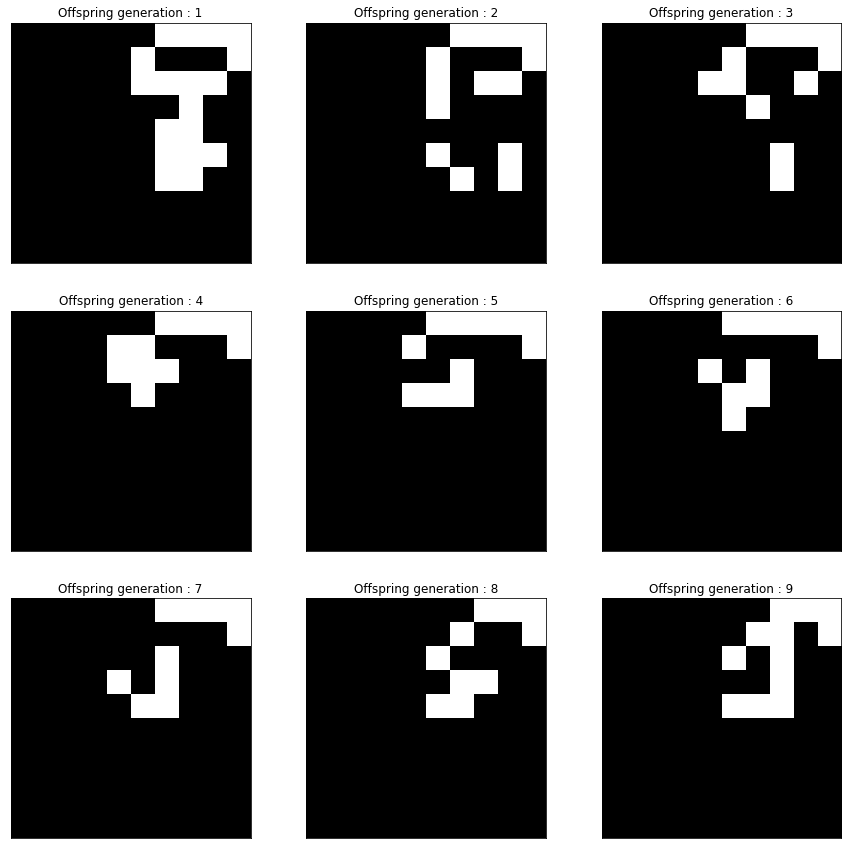

In [20]:
# Evolution plot
plt.figure(figsize=(15, 15))
for i in range(3):
    for j in range(3):
        padded_population_grid = padd_population(population_grid,n)
        offsprings = next_generation(padded_population_grid, n)
        plt.subplot(3,3,3*i+j+1)
        plt.imshow(population_grid,cmap='gray')
        plt.xticks([]), plt.yticks([])
        plt.title(f"Offspring generation : {3*i+j+1}")
        population_grid = offsprings
        
plt.show()

## Animation

In [6]:
%matplotlib notebook

<IPython.core.display.Javascript object>


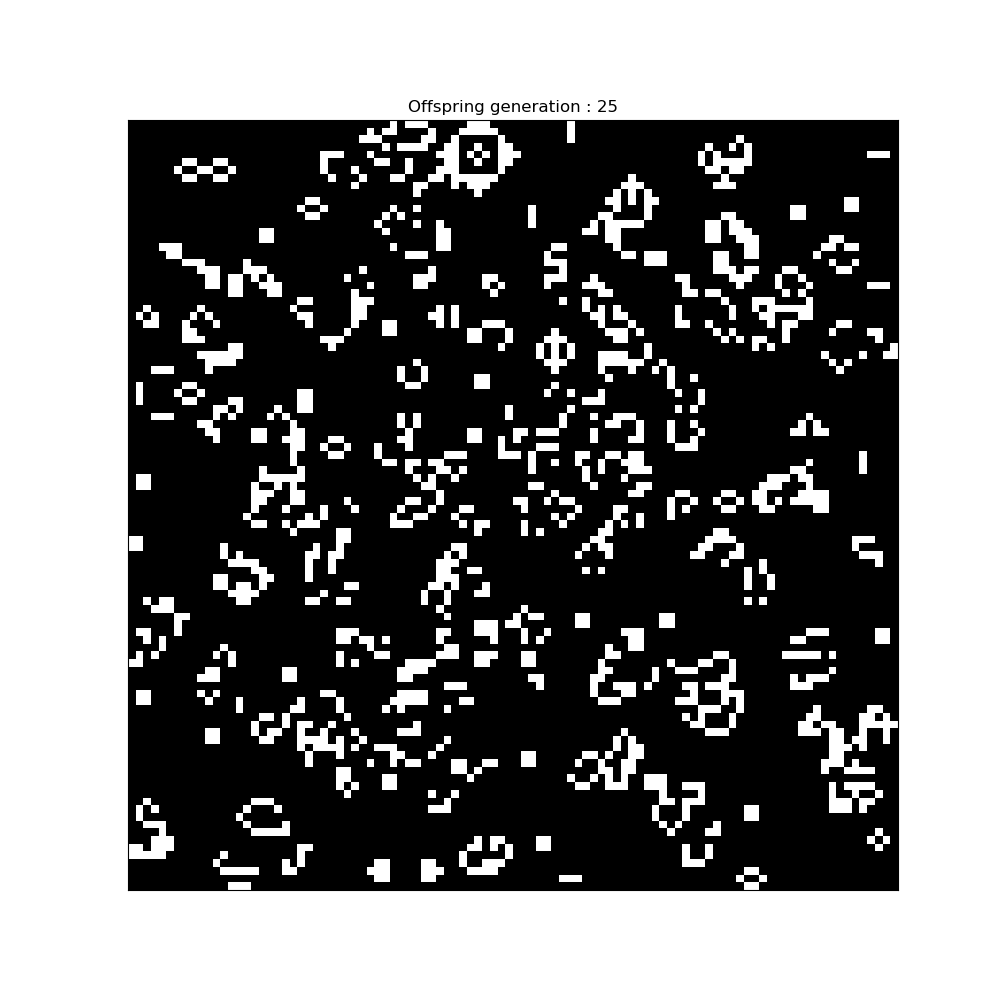

In [7]:
padded_population_grid = padd_population(population_grid,n)
fig = plt.figure(figsize=(10,10))
im = plt.imshow(population_grid, cmap='gray',animated=True)
i = 1
def updatefig(*args):
    global padded_population_grid, n, population_grid, i
    padded_population_grid = padd_population(population_grid,n)
    offsprings = next_generation(padded_population_grid, n)
    population_grid = offsprings
    im = plt.imshow(population_grid,cmap='gray', animated=True)
    plt.xticks([]), plt.yticks([])
    plt.title(f"Offspring generation : {i +1}")
    i+=1
    time.sleep(1)
    return [im]

# %matplotlib notebook
ani = animation.FuncAnimation(fig, updatefig, interval=500, blit=True)
plt.show()

<IPython.core.display.Javascript object>


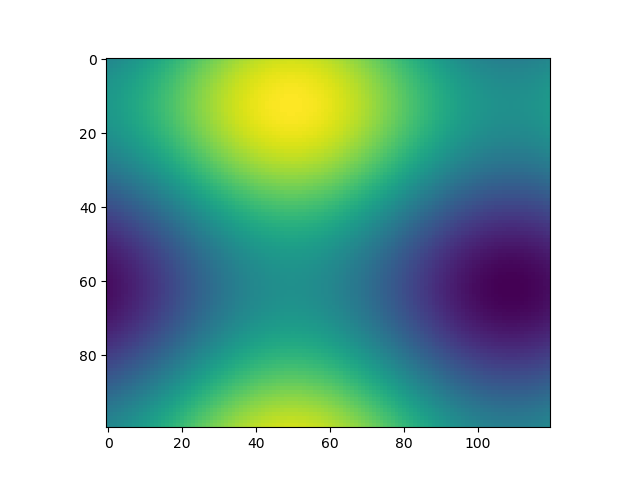

In [11]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()


def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)

im = plt.imshow(f(x, y), animated=True)


def updatefig(*args):
    global x, y
    x += np.pi / 15.
    y += np.pi / 20.
    im.set_array(f(x, y))
    return im,

ani = animation.FuncAnimation(fig, updatefig, interval=50, blit=True)
plt.show()